In [22]:
from nba_api.stats.endpoints import ShotChartDetail
import pandas as pd
import matplotlib.pyplot as plt
import os
import utils.nba_plot_utils as pu
import importlib
%matplotlib inline


In [23]:
# all of Stephen Curry's shots in the 2020-21 season
player_id = 201939  # Stephen Curry
season = '2020-21'

In [24]:
DATA_FOLDER = 'data/'

In [25]:
# pull the shot chart data
response = ShotChartDetail(
    player_id=player_id,
    team_id=0,  # 0 indicates that we want data for all teams
    season_nullable=season,
    context_measure_simple="FGA"  # FGA indicates that we want data on field goal attempts
)

In [26]:

# convert to a DataFrame
shot_data = response.get_data_frames()[0]

In [27]:
# save as a file
file_path = os.path.join(DATA_FOLDER, f'steph_curry_full_shots_{season}.csv')

In [28]:
shot_data.to_csv(file_path, index=False)

In [29]:
print(f"Data successfully downloaded and saved as '{file_path}'")
print(shot_data['SHOT_MADE_FLAG'].unique())

Data successfully downloaded and saved as 'data/steph_curry_full_shots_2020-21.csv'
[0 1]


In [30]:
# example - steph curry shot chart and visualization
# shot_data = pd.read_csv(file_path)

In [31]:
# drop rows where the shot distance is missing
shot_data = shot_data.dropna(subset=['LOC_X', 'LOC_Y'])

In [42]:
importlib.reload(pu)

<module 'utils.nba_plot_utils' from '/Users/yoav/Documents/Yoav/CS/20936 - DS Project/Shotpred/utils/nba_plot_utils.py'>

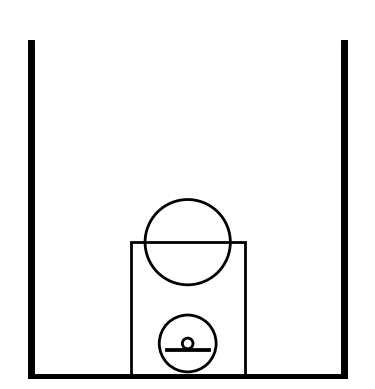

In [43]:
court = pu.draw_court()

In [20]:
fin = plot_shot_scatter(shot_data, court_ax=court, title=f'Stephen Curry Shot Chart {season}')

<function utils.nba_plot_utils.plot_shot_scatter()>

In [ ]:
# ציור הזריקות: ירוק להצלחות, אדום להחטאות

plt.show()


NameError: name 'data' is not defined

In [ ]:
from nba_api.stats.endpoints import ShotChartDetail
from nba_api.stats.static import players
import pandas as pd
from time import sleep
#הרחבת יצירת הדאטה לכל השחקנים בעונת 20-21 
#אני לא יכול להריץ את זה בבסיס (חייב וויפי נורמלי) תנסה להריץ אצלך בבית ותעדכן


# הגדרת עונת המשחק
season = '2020-21'

# שלב 1: משיכת כל רשימת השחקנים
all_players = players.get_players()
print(f"Total players fetched: {len(all_players)}")

# פונקציה להורדת נתוני זריקות לשחקן אחד
def get_shot_data(player_id, season):
    try:
        # שליפת נתוני זריקות לשחקן מסוים
        response = ShotChartDetail(
            player_id=player_id,
            team_id=0,  # כל הקבוצות
            season_nullable=season,
            context_measure_simple="FGA"  # כל הזריקות (כולל החטאות)
        )
        data = response.get_data_frames()[0]
        data['PLAYER_ID'] = player_id
        return data
    except Exception as e:
        print(f"Error fetching data for player {player_id}: {e}")
        return None

# שלב 2: איסוף נתוני זריקות לכל השחקנים
all_shot_data = []
for player in all_players:
    player_id = player['id']
    player_name = player['full_name']
    print(f"Fetching shot data for {player_name} (ID: {player_id})...")
    
    shot_data = get_shot_data(player_id, season)
    if shot_data is not None and not shot_data.empty:
        all_shot_data.append(shot_data)
    sleep(0.5)  # מנוחה קצרה כדי למנוע עומס על השרת

# שלב 3: שמירת כל הנתונים לקובץ CSV אחד
if all_shot_data:
    final_data = pd.concat(all_shot_data, ignore_index=True)
    final_data.to_csv("nba_shots_2020-21_all_players.csv", index=False)
    print("Data successfully saved to 'nba_shots_2020-21_all_players.csv'")
else:
    print("No shot data was fetched.")


In [4]:
from nba_api.stats.endpoints import ShotChartDetail
import pandas as pd
#נתנוי הזריקות של סטף קרי לאורך כל הקריירה 
#כמו הקובץ הקודם אשמח שתריץ אצלך אין לי וויפי בבסיס

# מזהה השחקן של סטף קרי
player_id = 201939

# משיכת נתוני הזריקות של סטף קרי לאורך כל הקריירה
response = ShotChartDetail(
    player_id=player_id,
    team_id=0,  # 0 מכוון לכל הקריירה ולא לקבוצה מסוימת
    season_nullable='ALL',  # כל העונות
    context_measure_simple='FGA'  # נתוני כל הזריקות
)

# קבלת הנתונים בפורמט JSON
data = response.get_json()

# יצירת DataFrame מתוך הנתונים
shot_data = response.shot_chart_detail.get_data_frame()

# שמירת הנתונים לקובץ CSV
output_file = 'stephen_curry_shot_data.csv'
shot_data.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"נתוני הזריקות של סטף קרי נשמרו בקובץ {output_file}")


נתוני הזריקות של סטף קרי נשמרו בקובץ stephen_curry_shot_data.csv


In [8]:
from nba_api.stats.endpoints import ShotChartDetail
import pandas as pd
#נתוני הזריקות של סטף בעונת 23-24
# מזהה השחקן של סטף קרי
player_id = 201939

# ננסה לשלוף נתוני זריקות עבור עונת 2023-2024
response = ShotChartDetail(
    player_id=player_id,
    team_id=0,
    season_nullable='2023-24',  # עונה ספציפית
    context_measure_simple='FGA'
)

# יצירת DataFrame מתוך הנתונים
shot_data = response.shot_chart_detail.get_data_frame()

# בדיקת הנתונים
if shot_data.empty:
    print("לא נמצאו נתונים גם לעונה הספציפית.")
else:
    print("נתונים נשלפו בהצלחה לעונה 2023-24.")
    print(shot_data.head())

    # שמירת הנתונים לקובץ CSV
    output_file = 'stephen_curry_shot_data_2023_24.csv'
    shot_data.to_csv(output_file, index=False, encoding='utf-8-sig')
    print(f"נתוני הזריקות נשמרו בקובץ {output_file}")


נתונים נשלפו בהצלחה לעונה 2023-24.
           GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID    PLAYER_NAME  \
0  Shot Chart Detail  0022300005             40     201939  Stephen Curry   
1  Shot Chart Detail  0022300005             53     201939  Stephen Curry   
2  Shot Chart Detail  0022300005            249     201939  Stephen Curry   
3  Shot Chart Detail  0022300005            281     201939  Stephen Curry   
4  Shot Chart Detail  0022300005            292     201939  Stephen Curry   

      TEAM_ID              TEAM_NAME  PERIOD  MINUTES_REMAINING  \
0  1610612744  Golden State Warriors       1                  8   
1  1610612744  Golden State Warriors       1                  7   
2  1610612744  Golden State Warriors       2                  6   
3  1610612744  Golden State Warriors       2                  3   
4  1610612744  Golden State Warriors       2                  2   

   SECONDS_REMAINING  ...         SHOT_ZONE_AREA  SHOT_ZONE_RANGE  \
0                 17  ...   Le

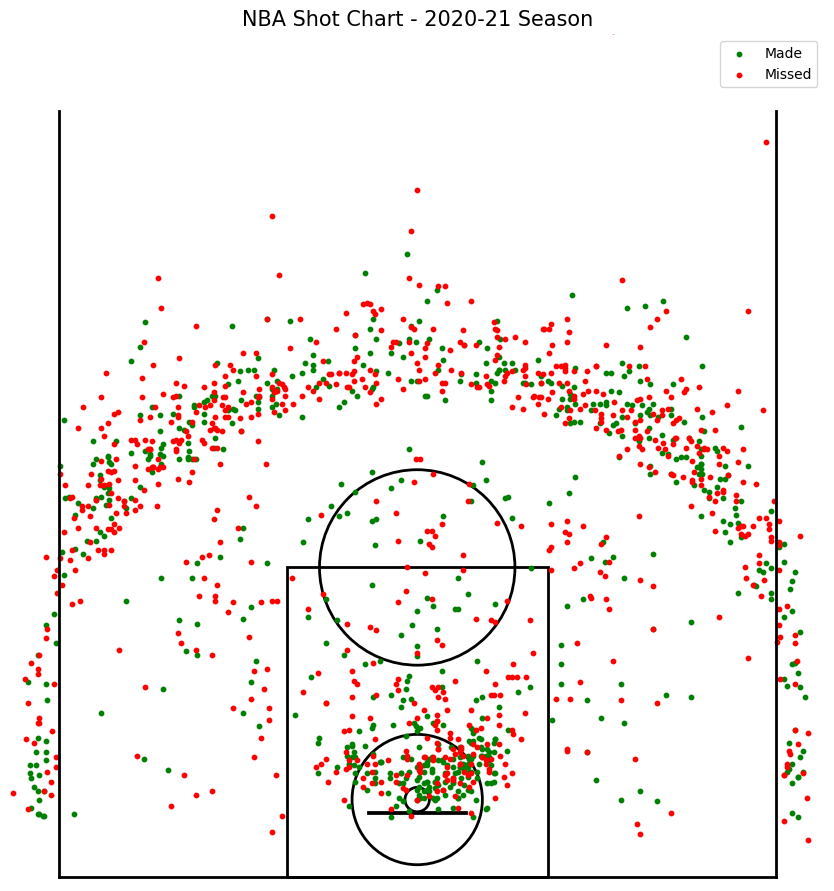

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#ויזואליזציה של סטף 23-24
# קריאת קובץ הנתונים של 2020-21
file_path = "/Users/home/stephen_curry_shot_data_2023_24.csv"  # שים את הקובץ הנכון פה
data = pd.read_csv(file_path)

# פילטר לזריקות בלבד (לא ריקות)
data = data.dropna(subset=['LOC_X', 'LOC_Y'])

# פונקציה לציור מגרש כדורסל
def draw_court(ax=None):
    if ax is None:
        ax = plt.gca()
    # גבולות המגרש
    hoop = plt.Circle((0, 0), 7.5, linewidth=2, color="black", fill=False)
    backboard = plt.Rectangle((-30, -7.5), 60, -1, linewidth=2, color="black")
    outer_box = plt.Rectangle((-80, -47.5), 160, 190, linewidth=2, color="black", fill=False)
    free_throw = plt.Circle((0, 142.5), 60, linewidth=2, color="black", fill=False)
    restricted = plt.Circle((0, 0), 40, linewidth=2, color="black", fill=False)

    # הוספת אלמנטים למגרש
    ax.add_patch(hoop)
    ax.add_patch(backboard)
    ax.add_patch(outer_box)
    ax.add_patch(free_throw)
    ax.add_patch(restricted)

    # קווי המגרש
    ax.plot([-220, 220], [-47.5, -47.5], linewidth=2, color="black")  # קו תחתון
    ax.plot([-220, -220], [-47.5, 422.5], linewidth=2, color="black")  # קו שמאלי
    ax.plot([220, 220], [-47.5, 422.5], linewidth=2, color="black")  # קו ימני

    # הגדרת צירים
    ax.set_xlim(-250, 250)
    ax.set_ylim(-50, 470)
    ax.set_aspect('equal')
    ax.axis('off')

# יצירת גרף עם מפת זריקות
%matplotlib inline
plt.figure(figsize=(12, 11))
ax = plt.gca()
draw_court(ax)

# ציור הזריקות: ירוק להצלחות, אדום להחטאות
made_shots = data[data['SHOT_MADE_FLAG'] == 1]
missed_shots = data[data['SHOT_MADE_FLAG'] == 0]

plt.scatter(made_shots['LOC_X'], made_shots['LOC_Y'], c='green', label="Made", s=10)
plt.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], c='red', label="Missed", s=10)

# כותרת ופרטים
plt.title("NBA Shot Chart - 2020-21 Season", fontsize=15)
plt.legend(loc='upper right')
plt.show()


הגרף נשמר בהצלחה בקובץ steph_curry_shot_chart_comparison.png


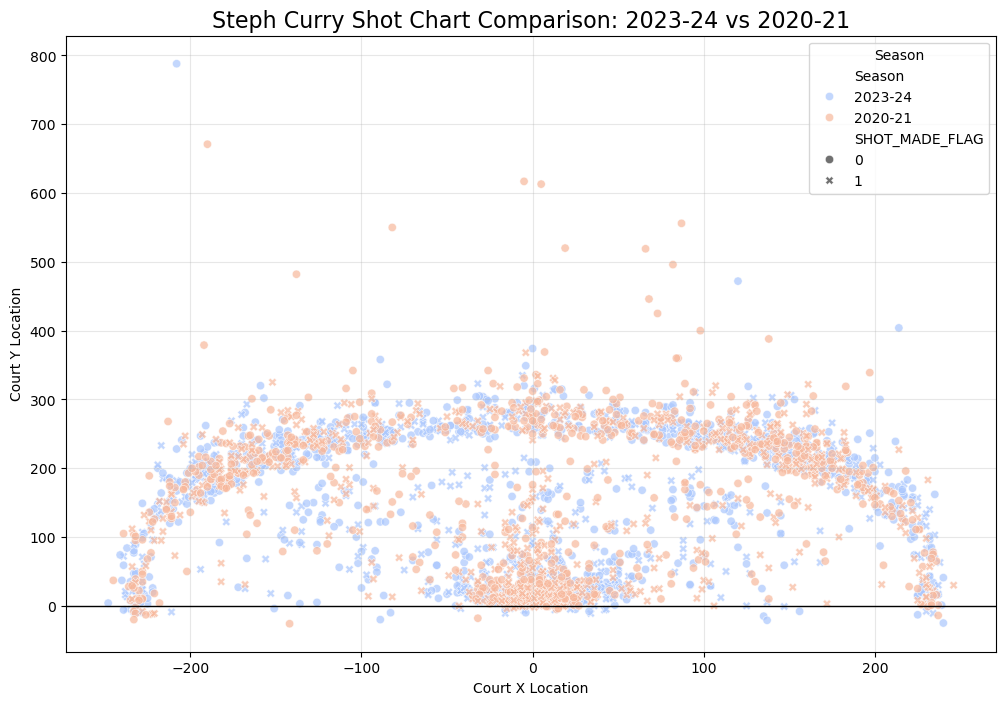

In [14]:
from nba_api.stats.endpoints import ShotChartDetail
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# פונקציה לשליפת נתוני זריקות עבור עונה נתונה
def fetch_shot_data(player_id, season):
    response = ShotChartDetail(
        player_id=player_id,
        team_id=0,
        season_nullable=season,
        context_measure_simple='FGA'
    )
    return response.shot_chart_detail.get_data_frame()

# מזהה השחקן של סטף קרי
player_id = 201939

# שליפת נתוני זריקות לשתי העונות
season_2023_24 = fetch_shot_data(player_id, '2023-24')
season_2020_21 = fetch_shot_data(player_id, '2020-21')

# הוספת עמודת עונה
season_2023_24['Season'] = '2023-24'
season_2020_21['Season'] = '2020-21'

# איחוד הנתונים לשתי העונות
combined_data = pd.concat([season_2023_24, season_2020_21])

# יצירת ויזואליזציה
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=combined_data,
    x='LOC_X', y='LOC_Y',
    hue='Season',
    style='SHOT_MADE_FLAG',  # סמל שונה לפי קליעה או החטאה
    palette='coolwarm',
    alpha=0.7
)
plt.title('Steph Curry Shot Chart Comparison: 2023-24 vs 2020-21', fontsize=16)
plt.xlabel('Court X Location')
plt.ylabel('Court Y Location')
plt.legend(title='Season')
plt.axhline(0, color='black', linewidth=1)  # קו לציון הקשת
plt.grid(alpha=0.3)

# שמירת הגרף לקובץ
chart_filename = 'steph_curry_shot_chart_comparison.png'
plt.savefig(chart_filename, dpi=300, bbox_inches='tight')  # שמירת קובץ עם איכות גבוהה
print(f"הגרף נשמר בהצלחה בקובץ {chart_filename}")

# הצגת הגרף
plt.show()
